In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [13]:
co2_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions')[1]

In [14]:
co2_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 10 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   (Country[20], Country[20])                                  212 non-null    object 
 1   (Fossil CO2 emissions(Mt CO2), 1990)                        212 non-null    float64
 2   (Fossil CO2 emissions(Mt CO2), 2005)                        212 non-null    float64
 3   (Fossil CO2 emissions(Mt CO2), 2017)                        212 non-null    float64
 4   (Fossil CO2 emissions, 2017(% of world))                    212 non-null    object 
 5   (Fossil CO2 emissions, 2017 vs 1990: change (%))            212 non-null    object 
 6   (2017 – Fossil CO2 emissions, Per land area(t CO2/km2/yr))  210 non-null    float64
 7   (2017 – Fossil CO2 emissions, Per capita(t CO2/cap/yr))     210 non-null    float64
 8   

In [15]:
# data for 1990, 2005 en 2017 exclude LULUCF, for 2018 use Total excluding LUCF as 'total_2018'
co2_table.columns = ['country', 'co2_1990', 'co2_2005', 'co2_2017', 'percent_of_world_2017', 'percent_change_1990_2017', 'per_land_area_2017', 'per_capita_2017', 'incl_lucf_2018', 'total_2018']
co2_table.drop(['percent_of_world_2017', 'percent_change_1990_2017', 'per_land_area_2017', 'per_capita_2017', 'incl_lucf_2018'], axis=1, inplace=True)
co2_table.head(10)

,country,co2_1990,co2_2005,co2_2017,total_2018
0,World,22674.116,30049.809,37077.404,35247.21
1,World – International Aviation,258.941,422.777,543.381,NaN
2,World – International Shipping,371.804,572.169,677.248,NaN
3,Afghanistan,2.546,1.063,11.422,7.44
4,Albania,6.583,4.196,5.026,5.56
5,Algeria,65.677,98.197,159.929,151.67
6,Angola,5.851,15.975,30.876,27.34
7,Anguilla,0.006,0.014,0.028,NaN
8,Antigua and Barbuda,0.223,0.283,0.624,0.53
9,Argentina,112.434,165.429,209.968,177.41


In [16]:
not_countries = (co2_table.country == 'European Union') | co2_table.country.str.contains('World')
co2_table.drop(co2_table.loc[not_countries].index, inplace=True)
co2_table.set_index('country', inplace=True)
co2_table.head(5)

,co2_1990,co2_2005,co2_2017,total_2018
country,,,,
Afghanistan,2.546,1.063,11.422,7.44
Albania,6.583,4.196,5.026,5.56
Algeria,65.677,98.197,159.929,151.67
Angola,5.851,15.975,30.876,27.34
Anguilla,0.006,0.014,0.028,NaN


In [17]:
co2_table.total_2018 = pd.to_numeric(co2_table.total_2018, errors='coerce')
# sorted_by_2018 = co2_table.sort_values(by='total_2018', ascending=False)[:5]
co2_table.sort_values(by='total_2018', ascending=False, inplace=True)
max_five_2018 = co2_table.iloc[0:5, 0:4]
max_five_2018

,co2_1990,co2_2005,co2_2017,total_2018
country,,,,
China,2397.048,6263.064,10877.218,10313.46
United States,5085.897,5971.571,5107.393,4981.30
India,605.968,1210.754,2454.774,2434.52
Russia,2378.921,1733.950,1764.866,1607.55
Japan,1149.400,1276.863,1320.776,1106.15


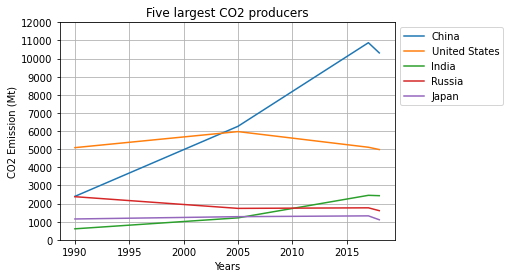

In [18]:
figure, ax = plt.subplots()
years = [1990, 2005, 2017, 2018]
for index, row in max_five_2018.iterrows():
  plt.plot(years, row[:], label=index)
_ = ax.set(xlabel="Years", ylabel="CO2 Emission (Mt)", title="Five largest CO2 producers")
ax.set_yticks(range(0, 12001, 1000))
ax.legend(bbox_to_anchor=(1,1))
ax.grid(True)

In [19]:
# Curaçao, Hong Kong, Serbia & Montenegro, Taiwan have no value for 2018 but where not in top or bottom three for 2017
co2_table['rel_1990'] = 100.0
co2_table['rel_2005'] = co2_table.apply(lambda row: (row.co2_2005/row.co2_1990) * 100, axis=1)
co2_table['rel_2017'] = co2_table.apply(lambda row: (row.co2_2017/row.co2_1990) * 100, axis=1)
co2_table['rel_2018'] = co2_table.apply(lambda row: (row.total_2018/row.co2_1990) * 100, axis=1)
co2_changes = co2_table.loc[(co2_table.co2_1990 > 5) & (co2_table.total_2018.notnull()), ['rel_1990', 'rel_2005', 'rel_2017', 'rel_2018']]
co2_changes.sort_values(by='rel_2018', ascending=True, inplace=True)
top_bottom_three = co2_changes.iloc[[0, 1, 2, -3, -2, -1]]
top_bottom_three

,rel_1990,rel_2005,rel_2017,rel_2018
country,,,,
North Korea,100.0,60.570167,28.754996,13.793628
Ukraine,100.0,45.253380,26.266646,23.667982
Armenia,100.0,21.943089,23.344123,26.812890
Bangladesh,100.0,280.025959,609.648111,596.769541
Oman,100.0,277.381353,659.887243,617.384719
Vietnam,100.0,491.680706,1083.782579,1277.673174


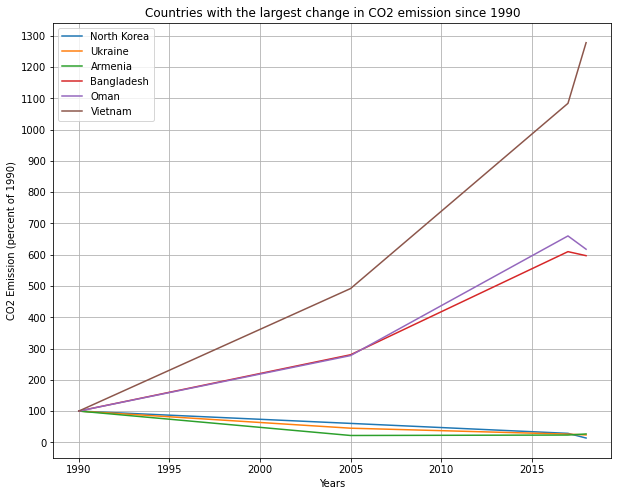

In [20]:
figure, ax = plt.subplots(figsize=(10, 8))
years = [1990, 2005, 2017, 2018]
for index, row in top_bottom_three.iterrows():
  ax.plot(years, row[:], label=index)
ax.set(xlabel='Years', ylabel='CO2 Emission (percent of 1990)', title='Countries with the largest change in CO2 emission since 1990')
ax.grid(True)
_ = ax.set_yticks(range(0, 1301, 100))
_ = ax.legend()